In [3]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.9 MB/s eta 0:00:00


In [4]:
pip install soltrannet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 734.6 kB/s eta 0:00:00


In [5]:
import soltrannet as stn

In [6]:
#testing a simple prediction
my_smiles=["c1ccccc1","c1ccccc1 .ignore","Cn1cnc2n(C)c(=O)n(C)c(=O)c12","[Zn+2]","[Na+].[Cl-]"]
predictions=list(stn.predict(my_smiles))

/usr/local/lib/python3.10/dist-packages/soltrannet/data_utils.py:207: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return [torch.FloatTensor(adjacency_list), torch.FloatTensor(features_list), smiles_list, index_list]


In [7]:
predictions

[(-1.052748441696167, 'c1ccccc1', ''),
 (-1.052748441696167, 'c1ccccc1 .ignore', ''),
 (-1.1322435140609741, 'Cn1cnc2n(C)c(=O)n(C)c(=O)c12', ''),
 (-6.881845474243164,
  '[Zn+2]',
  'Other-typed Atom(s) Detected Prediction less reliable'),
 (-0.16869020462036133,
  '[Na+].[Cl-]',
  'Salt Other-typed Atom(s) Detected Prediction less reliable')]

In [8]:
import sys

In [9]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [10]:
## Mount google drive
from google.colab import drive

In [11]:
drive.mount("/content/drive")

Mounted at /content/drive


In [12]:
# specifying my input folder
input_folder = "/content/drive/MyDrive/Ersilia"

In [13]:
# specifying my output folder
output_folder = "/content/drive/MyDrive/Ersilia"

In [16]:
input_filename = "llinas2020_raw"

In [17]:
#specifying my smiles column
smiles_column = "smiles"

In [18]:
import pandas as pd

In [19]:
# checking smiles
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 132 SMILES


In [20]:
df

,COMPOUND,SET,log S0,smiles
0,Acetazolamide,SET1,-2.38,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O
1,Acetylsalicylic Acid,SET1,-1.67,C(C)(=O)OC1=CC=CC=C1C(=O)O
2,Alclofenac,SET1,-4.40,C=CCOc1ccc(cc1Cl)CC(=O)O
3,Ambroxol,SET1,-3.87,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2
4,Aripiprazole,SET1,-6.64,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...
...,...,...,...,...
127,Sulfadimethoxine,SET2,-3.74,C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC
128,Tamoxifen,SET2,-7.52,C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)...
129,Telmisartan,SET2,-6.73,CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5...
130,Terfenadine,SET2,-7.74,C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)...


In [21]:
# Extract smiles from the DataFrame and make predictions
my_smiles = df["smiles"].tolist()
predictions = list(stn.predict(my_smiles))
predictions

/usr/local/lib/python3.10/dist-packages/soltrannet/data_utils.py:207: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return [torch.FloatTensor(adjacency_list), torch.FloatTensor(features_list), smiles_list, index_list]


[(-1.2419065237045288, 'CC(NC1=NN=C(S1)[S](N)(=O)=O)=O', ''),
 (-1.857985258102417, 'C(C)(=O)OC1=CC=CC=C1C(=O)O', ''),
 (-3.1197738647460938, 'C=CCOc1ccc(cc1Cl)CC(=O)O', ''),
 (-2.1994705200195312, 'O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2', ''),
 (-5.205143928527832,
  'O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c2)CC1',
  ''),
 (-6.521167755126953, 'O=C1c2ccccc2C(=O)C(O)=C1C1CCC(CC1)c1ccc([Cl])cc1', ''),
 (-2.817272663116455, 'CCNc1nc(nc(n1)Cl)NC(C)C', ''),
 (-1.7760668992996216, 'C1=CC(=CC=C1C(CC(O)=O)CN)Cl', ''),
 (-1.8396010398864746, 'CCC(C)C1(C(=O)NC(=O)NC1=O)CC', ''),
 (-4.210572719573975,
  'C1=C(Cl)C(=CC2=C1NC(=N[S]2(=O)=O)CSCC3=CC=CC=C3)[S](N)(=O)=O',
  ''),
 (-4.719670295715332, 'O=C1Nc2c(C(c3ncccc3)=NC1)cc(Br)cc2', ''),
 (-7.789661407470703,
  'CCOC1=NC2=CC=CC(=C2N1CC3=CC=C(C=C3)C4=CC=CC=C4C5=NNN=N5)C(=O)OC(C)OC(=O)OC6CCCCC6',
  ''),
 (-3.852696418762207, 'C1=CC=CC3=C1N(C2=C(C=CC=C2)C=C3)C(N)=O', ''),
 (-3.2515594959259033, 'C1=CC=CC2=C1[NH]C3=CC=CC=C23', ''),
 (-2.46783

In [22]:
predictions_df = pd.DataFrame(predictions, columns=["solubility", "smile", "truth"])
predictions_df
predictions_df.to_csv("/content/drive/MyDrive/Ersilia/SoltranetPredictions.csv", index=False)

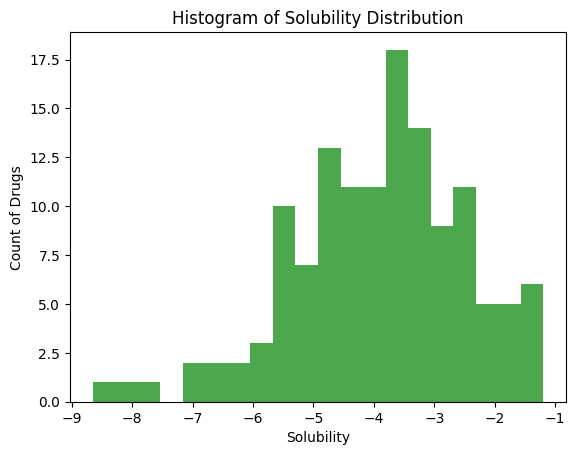

In [23]:
#recreating a plot in the publication
import matplotlib.pyplot as plt

solubility_values = predictions_df ['solubility']

# Create a histogram
plt.hist(solubility_values, bins=20, color='green', alpha=0.7)

# Add labels and title
plt.xlabel('Solubility')
plt.ylabel('Count of Drugs')
plt.title('Histogram of Solubility Distribution')

plt.savefig('/content/drive/MyDrive/Ersilia/SoltranetPrediction_plot.png')
# Show the plot
plt.show()